In [1]:
import pandas as pd 
COLUMNS = (
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'income'
)

with open('adult.data', 'r') as train_data:
    dataframe = pd.read_csv(train_data, header=None, names=COLUMNS)

In [2]:
dataframe.workclass.replace(('Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'),(1,2,3,4,5,6,7,8), inplace=True)
dataframe.education.replace(('Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16), inplace=True)
dataframe.marital_status.replace(('Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'),(1,2,3,4,5,6,7), inplace=True)
dataframe.occupation.replace(('Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14), inplace=True)
dataframe.relationship.replace(('Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'),(1,2,3,4,5,6), inplace=True)
dataframe.race.replace(('White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'),(1,2,3,4,5), inplace=True)
dataframe.sex.replace(('Female', 'Male'),(1,2), inplace=True)
dataframe.native_country.replace(('United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41), inplace=True)
dataframe.income.replace(('<=50K', '>50K'),(0,1), inplace=True)

In [3]:
import numpy 
dataframe_new = dataframe.replace({' ?': numpy.nan}).dropna()

In [4]:
with open('adult.test', 'r') as test_data:
    datatest = pd.read_csv(test_data, names=COLUMNS, skiprows=1)

In [5]:
datatest.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
datatest_new = datatest.replace({' ?': numpy.nan}).dropna()

In [7]:
dataframe_new.shape

(30162, 15)

In [8]:
numpy.unique(dataframe_new['workclass'])

array([' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay'], dtype=object)

In [9]:
dataframe_new.workclass = dataframe_new.workclass.replace((' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay'),(1,2,3,4,5,6,7))

In [10]:
datatest_new.workclass = datatest_new.workclass.replace((' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay'),(1,2,3,4,5,6,7))

In [11]:
dataframe_new.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,5,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,3,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,3,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,3,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
numpy.unique(dataframe_new.education)

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

In [13]:
dataframe_new.education = dataframe_new.education.replace((' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16))

In [14]:
numpy.unique(dataframe_new.marital_status)

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

In [15]:
datatest_new.education = datatest_new.education.replace((' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16))

In [16]:
dataframe_new.marital_status = dataframe_new.marital_status.replace((' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'),(1,2,3,4,5,6,7))
datatest_new.marital_status = datatest_new.marital_status.replace((' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'),(1,2,3,4,5,6,7))

In [17]:
numpy.unique(dataframe_new.occupation)

array([' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [18]:
dataframe_new.occupation = dataframe_new.occupation.replace((' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14))
datatest_new.occupation = datatest_new.occupation.replace((' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14))

In [19]:
print (len(numpy.unique(dataframe_new.relationship)) ," ",numpy.unique(dataframe_new.relationship))

6   [' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']


In [20]:
dataframe_new.relationship = dataframe_new.relationship.replace((' Husband', ' Not-in-family', ' Other-relative', ' Own-child' ,' Unmarried'
, ' Wife'),(1,2,3,4,5,6))
datatest_new.relationship = datatest_new.relationship.replace((' Husband', ' Not-in-family', ' Other-relative', ' Own-child' ,' Unmarried'
, ' Wife'),(1,2,3,4,5,6))

In [21]:
numpy.unique(datatest_new.race)

array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'], dtype=object)

In [22]:
dataframe_new.race = dataframe_new.race.replace((' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'),(1,2,3,4,5))
datatest_new.race = datatest_new.race.replace((' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'),(1,2,3,4,5))

In [24]:
numpy.unique(dataframe_new.sex)

array([' Female', ' Male'], dtype=object)

In [25]:
dataframe_new.sex = dataframe_new.sex.replace((' Female', ' Male'),(1,2))
datatest_new.sex = datatest_new.sex.replace((' Female', ' Male'),(1,2))


In [28]:
numpy.unique(dataframe_new.native_country)

array([' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia'], dtype=object)

In [33]:
li = list(range(1,42))
tu = tuple(li)

In [34]:
dataframe_new.native_country = dataframe_new.native_country.replace((' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia'),tu)

datatest_new.native_country = datatest_new.native_country.replace((' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia'),tu)


In [36]:
dataframe_new.income =  dataframe_new.income.replace((' <=50K',' >50K'),(1,2))
datatest_new.income = datatest_new.income.replace((' <=50K.',' >50K.'),(1,2))

In [37]:
dataframe_new


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,10,13,5,1,2,5,2,2174,0,40,39,1
1,50,5,83311,10,13,3,4,1,5,2,0,0,13,39,1
2,38,3,215646,12,9,1,6,2,5,2,0,0,40,39,1
3,53,3,234721,2,7,3,6,1,3,2,0,0,40,39,1
4,28,3,338409,10,13,3,10,6,3,1,0,0,40,5,1
5,37,3,284582,13,14,3,4,6,5,1,0,0,40,39,1
6,49,3,160187,7,5,4,8,2,3,1,0,0,16,23,1
7,52,5,209642,12,9,3,4,1,5,2,0,0,45,39,2
8,31,3,45781,13,14,5,10,2,5,1,14084,0,50,39,2
9,42,3,159449,10,13,3,4,1,5,2,5178,0,40,39,2


In [39]:
dataframe_new.corr(method='pearson')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
age,1.000000,0.080540,-0.076511,-0.001111,0.043526,-0.276373,-0.005682,-0.246456,0.023374,0.081993,0.080154,0.060165,0.101599,-0.001905,0.241998
workclass,0.080540,1.000000,-0.032493,0.017855,0.037833,-0.034241,0.015572,-0.067417,0.044731,0.074973,0.035350,0.007204,0.050724,0.007668,0.018044
fnlwgt,-0.076511,-0.032493,1.000000,-0.027102,-0.044992,0.032163,0.000204,0.009298,-0.023895,0.025362,0.000422,-0.009750,-0.022886,-0.066717,-0.008957
education,-0.001111,0.017855,-0.027102,1.000000,0.345410,-0.040664,-0.038212,-0.012717,0.011154,-0.027888,0.030575,0.015028,0.059887,0.078790,0.078987
education_num,0.043526,0.037833,-0.044992,0.345410,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006157,0.124416,0.079646,0.152522,0.091555,0.335286
marital_status,-0.276373,-0.034241,0.032163,-0.040664,-0.063419,1.000000,0.022655,0.177964,-0.068627,-0.119813,-0.042418,-0.035203,-0.189003,-0.025902,-0.193518
occupation,-0.005682,0.015572,0.000204,-0.038212,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062313,0.022162,0.014607,0.018365,-0.003483,0.051577
relationship,-0.246456,-0.067417,0.009298,-0.012717,-0.091935,0.177964,-0.053727,1.000000,-0.117143,-0.584876,-0.058259,-0.063567,-0.257850,-0.010809,-0.251003
race,0.023374,0.044731,-0.023895,0.011154,0.032805,-0.068627,0.000717,-0.117143,1.000000,0.089186,0.014353,0.023517,0.048532,0.124514,0.071658
sex,0.081993,0.074973,0.025362,-0.027888,0.006157,-0.119813,0.062313,-0.584876,0.089186,1.000000,0.048814,0.047011,0.231268,0.000618,0.216699


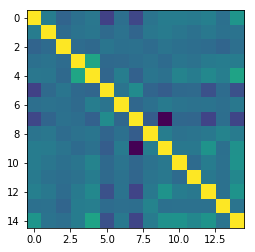

In [41]:
import matplotlib.pyplot as plt
plt.imshow(dataframe_new.corr(method='pearson'), interpolation='nearest')
plt.show()